First ideas
- Get ideas from pipeline from kernels starting from https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- READ https://habr.com/ru/company/ods/blog/336168/?_ga=2.258722307.840142816.1608463814-224606043.1573983354


# Common competition pipeline

# Introduction



# 1. Exploratory data analysis


In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the `columns` property of the DataFrame (the bottom line of code below).

In [33]:
file_path = 'input/train.csv'
train_data = pd.read_csv(file_path, index_col=0) 
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

In [45]:
target_col = 'SalePrice'

y = train_data[target_col]
X = train_data.drop(target_col, axis=1)

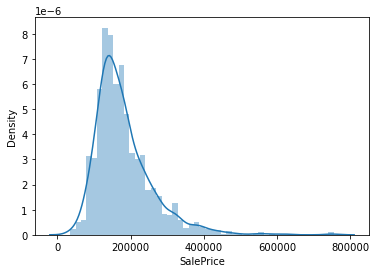

In [47]:
#histogram
sns.distplot(y);

In [51]:
#skewness and kurtosis
print(f"Skewness: {y.skew()}")
print(f"Kurtosis: {y.kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Let's quickly review the data we'll be using to predict ... using the `describe` method and the head method, which shows the top few rows.

In [35]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [36]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


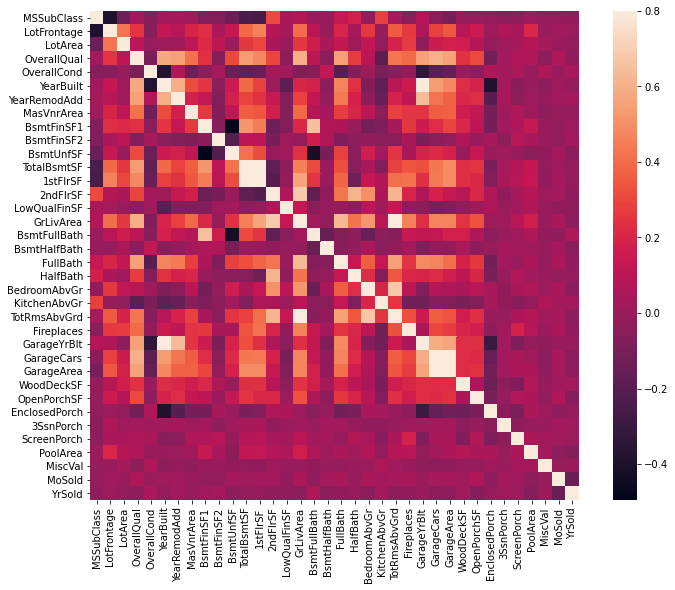

In [53]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# 2. Data Cleaning
## 2.1. Missing Values

In [37]:
# Get names of columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(f"Columns with missing values are: {cols_with_missing}")

Columns with missing values are: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


### 2.1.1. Imputation

Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column. The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries. In some cases, this meaningfully improve results.

In [38]:
X.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import TransformerMixin

# Make copy to avoid changing original data (when imputing)
X_ = X.copy()

# Get numeric and categorical numbers
num_cols = X_plus.select_dtypes(include=np.number).columns
cat_cols = X_plus.select_dtypes(exclude=np.number).columns

# make new columns indicating what will be imputed
cols_with_missing = (col for col in X_.columns 
                                 if X_[col].isnull().any())
for col in cols_with_missing:
    X_[col + '_was_missing'] = X_[col].isnull()


class MeanFreqImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column. Columns of other types are imputed with mean of column.
        """
        
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
X_imputed = MeanFreqImputer().fit_transform(X_)
X_imputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Electrical_was_missing,FireplaceQu_was_missing,GarageType_was_missing,GarageYrBlt_was_missing,GarageFinish_was_missing,GarageQual_was_missing,GarageCond_was_missing,PoolQC_was_missing,Fence_was_missing,MiscFeature_was_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,False,True,False,False,False,False,False,True,True,True
2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,True,True,True
3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,True,True,True
4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,False,True,True,True
5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,True,True,True
1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,True,False,True
1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,True,False,False


# 3. Data Preparation
## 3.1. Common Data preparation

## 3.2. Label Encoding

Label encoding assigns each unique value to a different integer. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

## 3.3. One-Hot Encoding

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. In contrast to label encoding, one-hot encoding does not assume an ordering of the categories. We refer to categorical variables without an intrinsic ranking as nominal variables.

### Frequency

### Scaling

## Statistics
## Boxplots

# Data Cleaning
## Fill N/A
## Categories cleaning
## Categories merge



## Neural networks
## Decision trees
## Time series
## Computer vision
## Text
### Count, TF-IDF, Hash
### Embeddings: Glove, Word2Vec, Fasttext

# Models
## Linear models
## Tree models: LGB/XGB/Catboost
## Neural networks: CNN, RNN, Autoencorders
## Exotic

# Hyperparameters search
## Bayesian optimization
## hyperopt

# Feature selection
## Shuffle
## Target permutation
## Boruta
## RFE

# Ensemble

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model = DecisionTreeRegressor(random_state=0)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

# Conclusion

# Sources for pipeline ideas
- https://m.habr.com/ru/company/ods/blog/426227/

# Sources
- https://www.kaggle.com/alexisbcook/missing-values